# HW 1 - Configuration

Eduardo Alvarez, 20170919

## Prompt 1

__PROMPT:__ Choose your team and create a team name. Report your team name, the team leader, and the names of all members of the team.

* Team name: Unstallables
* Team leader: Jenna Newcomb
* Members: Jenna Newcomb, Austin Schenk, Kevin Moore, Dagan Pielstick, Eduardo Alvarez

## Prompt 2

__PROMPT:__ Choose the configuration for your aircraft (you aren’t locked in). In making your selection, evaluate at least three different aircraft configurations, and provide justification for your choice. You aren’t expected to know all the pros and cons of the various design choices, but do some research to help you understand some of the high-level tradeoffs. Some design choices to think about include, but are not limited to: tail vs canard vs flying wing, tail type (H, V, T, etc.), pusher vs tractor, fuselage type, materials, basic wing sizing (at least the wingspan), use of winglets or not, etc. Provide a top view (or even better a 3-view) of the design and some of the primary dimensions.

The three concepts described below were compared, and we decided build the canard configuration. Given that the mission of this project is autonomous flying on a GPS feedback, our design must be very stable, which discarded immediately the Delta Flying Wing. Also the distributed propulsion concept involves aerodynamic interactions between propellers and the motion of the wing that would make it very difficult to use on a stable design. In the other hand, the canard configuration looks very promising for the mission since it should be able to buffer up any stalling of the main wing, adding extra stability.

### 1. Delta Flying Wing

<img src="img/IMG_2947.JPG" alt="Pic here" style="width:500px">

This concept places emulates the design of a jet fighter by fusing the fuselage into a delta wing. Control surfaces in the trailing edge controls the pitch and roll. Two vertical tails add rolling stability and their control surfaces control yaw.

* Materials: Cardboard.
* Propulsion: Tractor propeller.

__PROS__
* Really good looking design.
* Strong structure (cardboard).

__CONS__
* Probably very unstable and easy to stall.
* Difficult manufacturability.

### 2. Canard

<img src="img/IMG_2946.JPG" alt="Pic here" style="width:500px">

This concept places a canard in the nose, forcing the canard to stall before the wing avoiding unstabilities due to wing stall. Control surfaces in the canard controls the pitch, and yaw is control through a control surface on the vertical tail. The vertical tail adds rolling stability.

* Materials: Foam for wing and canard, cardboard for fuselage and vertical tail.
* Propulsion: Pusher propeller.

__PROS__
* Great stability and virtually unstallable.

__CONS__
* Wouldn't the propeller blowing on the canard delay stall on the canard making it possible for the wing to stall before the canard?
* Weird looking.

### 3. Distributed Propulsion

<img src="img/IMG_2945.JPG" alt="Pic here" style="width:500px">

This concept mounts four propellers along a movable wing, being able to do vertical take off and landing. The rate of climb is controlled both by the variable angle of attack of the wing and throttle. Yaw and roll is controlled by both a differential throttle control across both sides of the wing, and non-uniform angle of attack between left and right wings. Control surfaces in the horizontal tail stabilize the pitch, and rolling stability is added with a vertical tail.

* Materials: Foam for wing and horizontal tail, cardboard for fuselage and vertical tail.
* Propulsion: Four pusher propellers mounted on a variable-angle wing.

__PROS__
* Great meanuvearibility through controlling the propellers.
* Propellers blowing on the wing would delay stall.
* Great learning experience!

__CONS__
* Difficult manufacturability.
* Wing wouln't withstand a crash.
* Very complicated controls.

## Prompt 3

__PROMPT:__ Estimate the total mass of your aircraft in grams, including all electronic components. At this stage there are some things you can measure directly and others that you will need to estimate. Electrical components will all be (more or less) the same for all teams, but the airframe mass will differ depending on your specific design. Make estimates for each component (i.e., wing, horizontal tail, etc.), as opposed to the airframe all at once. Rough estimates are ok at this stage, but there needs to be a rational basis for the estimates.

<strong>Component &nbsp; &nbsp;Estimated Weight (grams/each)</strong><br>ESC (1): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 28<br>BEC (1): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 16<br>Raspberry Pi 3&nbsp;(1): 47<br>Flip32&nbsp;(1): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 14<br>Battery&nbsp;(1): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 136<br>Propeller&nbsp;(1): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;18<br>GPS&nbsp;(1): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 32<br>Motor&nbsp;(1): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 45<br>Servos (2-4): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;9<br>Wires, connectors, etc throughout plane: &nbsp;50
<br>Wing: &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 350
<br>Canard:  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 50
<br>Fuselage: &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 450
<br>Vertical tail: &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;10</p>


In [1]:
total_weight = 28+16+47+14+136+18+32+45+9*4+50+350+50+450+10
println("Estimated total weight: $(total_weight) (g)")

Estimated total weight: 1282 (g)


The structural weights shown above are based on rough estimates of styrofoam and cardboard densities, escalated by the rough volume of wing and fuselage from the leading dimensions shown in the drawing of P2.

## Prompt 4

<img src="img/table01.png" alt="Pic here" style="width:300px">


In [2]:
# -------- PARAMETERS
b = 61        # (m) Wing span
Sref = 325    # (m^2) Reference area
M = 2*10^5    # (kg) Mass
Ma = 0.82     # Mach number
CDvis = 0.01  # Zero lift drag coefficient
e = 0.7;      # Oswald efficiency factor

# -------- ASSUMPTIONS
Tsl = 20+273  # (K) Sea-level temperature
Psl = 101352.9# (Pa) Sea-level pressure
R = 286.9     # (J/kgK)=(m^2/s^2kgK) Air gas constant
gamma = 1.4   # Heat capacity ratio of air


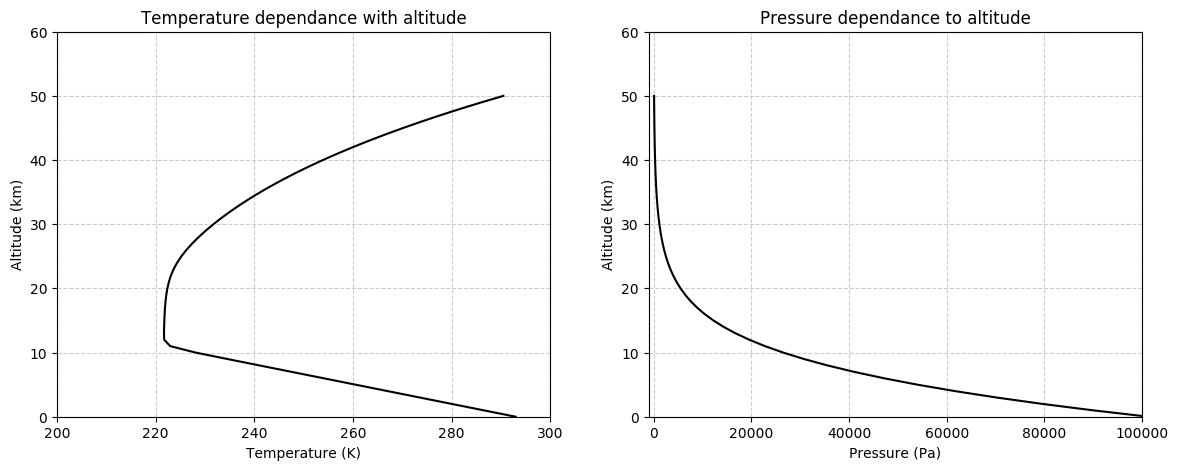

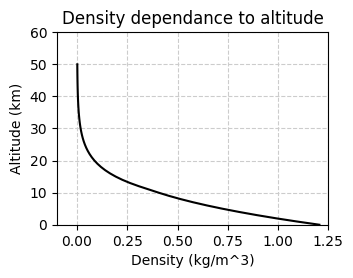

In [3]:
using PyPlot
fig = figure("atmosphere",figsize=(7*2,5*1))
hs = [h for h in 0:50]

# ------- ATMOSPHERIC MODEL

# Temperature (h in km)
T_curve(h, T0) = T0 - 71.5 + 2*log(1+exp(35.75-3.25*h) + exp(-3 + 0.0003*h.^3))

subplot(121)
plot(T_curve(hs, Tsl), hs, "k")
xlim([200, 300])
ylim([0, 60])
xlabel("Temperature (K)")
ylabel("Altitude (km)")
grid(true, color="0.8", linestyle="--")
title("Temperature dependance with altitude")

# Pressure (h in km)
P_curve(h, P0) = P0 * exp(-0.118*h - 0.0015*h.^2./(1-0.018*h+0.0011*h.^2))

subplot(122)
plot(P_curve(hs, Psl), hs, "k")
xlim([-1000, 10^5])
ylim([0, 60])
xlabel("Pressure (Pa)")
ylabel("Altitude (km)")
grid(true, color="0.8", linestyle="--")
title("Pressure dependance to altitude");


# Air density (h in km)
rho_curve(h, P0, T0) = P_curve(h, P0)./(R*T_curve(h, T0))

fig2 = figure("atm2", figsize=(7*0.5,5*0.5))
plot(rho_curve(hs, Psl, Tsl), hs, "k")
xlim([-0.1, 1.25])
ylim([0, 60])
xlabel("Density (kg/m^3)")
ylabel("Altitude (km)")
grid(true, color="0.8", linestyle="--")
title("Density dependance to altitude");


Since it is level flight, we have that the lift equals the weight of the plane ($L=Mg$). The drag will be calculated as 

\begin{align}
    D = {C_D}_0 q S + \frac{L^2}{q \pi b^2 e}
\end{align}

with $q{\tiny (h, V_\infty)} = \frac{\rho{\tiny (h)} V_\infty^2}{2}$ and $\rho{\tiny (h)} = \frac{P{\tiny (h)}}{RT{\tiny (h)}}$, and since the flight conditions are at a constant Mach number $Ma=0.82$, the flight speed will vary with altitude according to 

\begin{align}
        V_\infty{\tiny (h)} & = c{\tiny (h)} Ma
    \\
        & = \sqrt{\gamma \frac{P{\tiny (h)}}{\rho{\tiny (h)}}} \cdot Ma
    \\
        & = \sqrt{\gamma RT{\tiny (h)} } \cdot Ma 
\end{align}

$q{\tiny(h)}$ becomes:

\begin{align}
        q{\tiny(h)} & = \frac{\rho{\tiny (h)} V_\infty^2{\tiny(h)}}{2}
    \\
        & = \frac{1}{2} \rho{\tiny (h)}
            \Big( \sqrt{\gamma \frac{P{\tiny (h)}}{\rho{\tiny (h)}}}
                \cdot Ma \Big)^2
    \\
        & = \frac{\gamma}{2} \rho{\tiny (h)}
             \frac{P{\tiny (h)}}{\rho{\tiny (h)}}
                \cdot Ma^2 
    \\
        & = \frac{\gamma Ma^2 }{2}  P{\tiny (h)}
\end{align}

Hence, $q{\tiny(h)}$ will follow the same trend than $P{\tiny(h)}$

Now, we are trying to maximize the metric $f = V\frac{L}{D}$, hence the objective becomes:

\begin{align}
    f{\tiny (L, h)} & = V_\infty{\tiny(h)} \frac{L}{
        {C_{D_0}} q{\tiny(h)} S + \frac{L^2}{q{\tiny(h)} \pi b^2 e}
        }
\\
    & = \sqrt{\gamma RT{\tiny (h)} } \cdot Ma 
        \frac{L}{
        {C_{D_0}} q{\tiny(h)} S + \frac{L^2}{q{\tiny(h)} \pi b^2 e}
        }
\end{align}

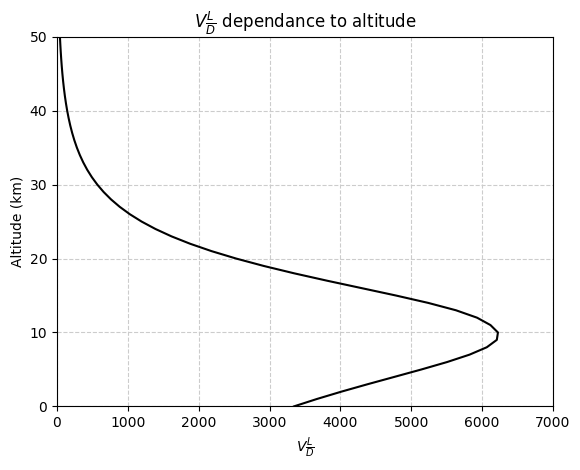

PyObject <matplotlib.text.Text object at 0x7fccce517990>

In [4]:
q_curve(h, P0) = gamma*Ma^2/2 * P_curve(h,P0)
Vinf_curve(h, T0) = sqrt(gamma*R*T_curve(h,T0)) * Ma

f(L, h) = Vinf_curve(h,Tsl) * L / (
        CDvis*q_curve(h,Psl)*Sref + L^2/(q_curve(h,Psl)*pi*b^2*e)
    )

y = [i for i in 0:1:50]
x = [f(M*9.8, h) for h in y]
plot(x,y, "k")
xlabel(L"V\frac{L}{D}")
ylabel("Altitude (km)")
xlim([0, 7000])
ylim([0, 50])
grid(true, color="0.8", linestyle="--")
title(L"$V\frac{L}{D}$ dependance to altitude")

Hence, the altitude $h^*$ that maximizes $V\frac{L}{D}$ is $h^*\approx10$km when $M=2\times10^5$kg. If we consider that the mass changes as the fuel is being burnt (and the lift required changes accordingly), we have the following relation between $f{\tiny(L,h)}$, $L$, and $h$:

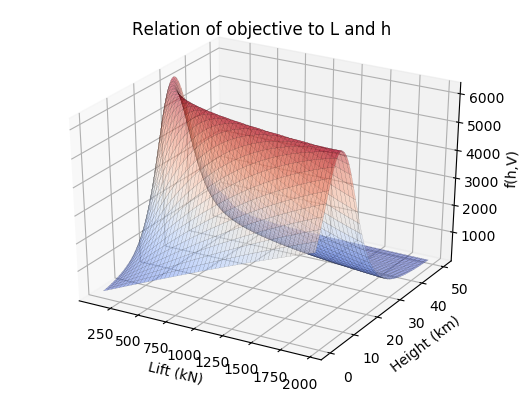

PyObject <matplotlib.text.Text object at 0x7fccce23a790>

In [5]:
xmin, xmax = 10^5, M*9.8 # Lift bounds
ymin, ymax = 0.0, 50.0 # Height bounds
n = 100

x = linspace(xmin, xmax, n)
y = linspace(ymin, ymax, n)

xgrid = repmat(x',n,1)
ygrid = repmat(y,1,n)

z = zeros(n,n)

for i in 1:n
    for j in 1:n
        z[j,i] = f(x[i],y[j])
    end
end

pygui(false)
fig = figure("3")
plot_surface(xgrid/1000, ygrid, z,
            rstride=2,edgecolors="k", cstride=2,
            cmap=ColorMap("coolwarm"), alpha=0.5, linewidth=0.05)
xlabel("Lift (kN)")
ylabel("Height (km)")
zlabel("f(h,V)")
title("Relation of objective to L and h")

The relation is not very useful from that surface plot, so lets do some lines:

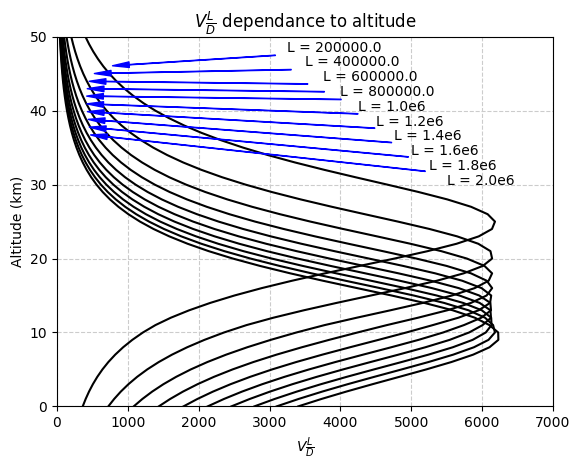

PyObject <matplotlib.text.Text object at 0x7fccce17e9d0>

In [6]:
for (i,L_i) in enumerate(200000:200000:2e6)
    y = [i for i in 0:1:50]
    x = [f(L_i, h) for h in y]
    plot(x,y, "k")
    annotate("L = $(round(L_i))", xy=(x[48-i], y[48-i]),
            xytext=(3000+250*i, 50-2*i),
            arrowprops=Dict("color"=>"blue", "shrink"=>0.05,
                            "width"=>0.25, "headwidth"=>4))
end
    xlabel(L"V\frac{L}{D}")
    ylabel("Altitude (km)")
    xlim([0, 7000])
    ylim([0, 50])
    grid(true, color="0.8", linestyle="--")
    title(L"$V\frac{L}{D}$ dependance to altitude")

(arrows do not indicate the optimum altitude, but rather label each curve with the corresponding lift)

Hence, $h^*$ (optimum altitude) increases as the lift required decreases. This can be explained by noticing in the $h$-$L$-$D$ surface plot below that as the lift decreases, increasing the height decreases the drag.

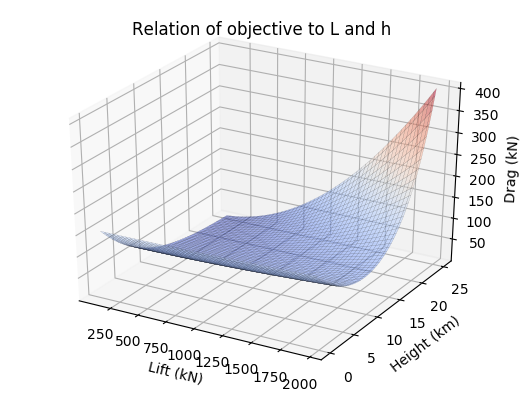

PyObject <matplotlib.text.Text object at 0x7fccce09ba50>

In [7]:
D(L, h) = CDvis*q_curve(h,Psl)*Sref + L^2/(q_curve(h,Psl)*pi*b^2*e)

xmin, xmax = 10^5, M*9.8 # Lift bounds
ymin, ymax = 0.0, 25.0 # Height bounds
n = 100

x = linspace(xmin, xmax, n)
y = linspace(ymin, ymax, n)

xgrid = repmat(x',n,1)
ygrid = repmat(y,1,n)

z = zeros(n,n)

for i in 1:n
    for j in 1:n
        z[j,i] = D(x[i],y[j])
    end
end

pygui(false)
fig = figure("3")
plot_surface(xgrid/1000, ygrid, z/1000,
            rstride=2,edgecolors="k", cstride=2,
            cmap=ColorMap("coolwarm"), alpha=0.5, linewidth=0.05)
xlabel("Lift (kN)")
ylabel("Height (km)")
zlabel("Drag (kN)")
title("Relation of objective to L and h")